# CSG Jupyter Notebook Tutorial

In [1]:
from IPython.display import HTML

In [2]:
%%html
<link rel="stylesheet" type="text/css" href="styles.css">
<style>
h1.toc, h2.toc, h3.toc, h4.toc {
  display: inline;
}
</style>
<div class="toc"></div>

## What is the Jupyter notebook? 

A web-based notebook for performing data analysis, supporting multiple languages (primary language is Python, but R works as well.)  

Think of it like Mathematica or Maple, with some additional features, and for general programming languages. 

The notebook contains cells, which can be of multiple types: 

* Headings
* Markdown 
* Code

Markdown is a simple markup language - more info [https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet). 

Code cells are exactly that - just code. 

## How do I install it? 

### Using miniconda/anaconda

This is probably the easiest method of all, on all platforms. 

You can download the relevant installer for Windows, OSX, and Linux here: 

https://www.continuum.io/downloads

** WARNING **: the installer will ask if you want to put Anaconda's packages/binaries on your PATH. If you only want to use Anaconda for jupyter related things, but leave your existing R installation as the primary one (when you type R at the terminal), you should say **NO**. 

#### Install jupyter

```bash
# If you added anaconda to your PATH during the install
conda install jupyter

# If you didn't
~/anaconda2/bin/conda install jupyter
```

#### Install optional packages

```bash
# Substitute conda for ~/ananaconda2/bin/conda if conda is not on your PATH
conda install numpy pandas rpy2 matplotlib seaborn bokeh
```

#### Install R kernel 

If you want to use R code in your notebooks natively (without the %Rpull rpy2 trick), you can install the IRkernel, which allows you to create notebooks for R. 

```
conda install -c r r-irkernel
```

Now, when you start the jupyter notebook server, you should be able to select "R" as well as "Python" when creating new notebooks. 

### Using pip

pip is the python package manager, and it can be used to install python packages locally into your home directory. 

Unfortunately, it can be somewhat of a pain to force pip not to use system installed python packages, even with virtualenvs. 

#### Install pip

If you don't already have pip (python package installer tool), run this: 

```bash
curl https://bootstrap.pypa.io/get-pip.py
python ./get-pip.py --user
```

This installs pip, along with its dependencies, into `~/.local/`. 

#### Install jupyter

Now you can install jupyter: 

```bash
# The --user flag tells pip to install into your home directory under ~/.local/
pip install --user jupyter
```

#### Install optional packages

For plotting/pushing objects to R, you'll need the `rpy2` package installed. You can install it to your own home directory with: 

```bash
pip install --user rpy2
```

For plotting with python, you would install: 

```bash
pip install --user matplotlib seaborn bokeh
```

## How do I run it?

### On your own computer

On Windows, there should be an icon on the desktop, or search for jupyter by hitting Win+S. 

On OSX or Linux, you can type the following in a terminal: 

```bash
jupyter notebook &
```

What's happening when I do this? 

<div style="margin-right: auto"><img src="jupyter_diagram_local.png"></div>

### On a remote server (like snowwhite, dumbo, etc.)

#### Using X11

This is probably the easiest way, but it's also quite sluggish. Still good to know if you don't want to go through the trouble of the next option. 

Start an X-server running on your computer (Xwin, Exceed, MobaXterm, etc.). 

Then, ssh to the server (snowwhite, dumbo, etc.) and run: 

```bash
jupyter notebook --port <random number> &
```

Where `<random number>` is > 1024 and < 65535.  

#### SSH port forwarding

This method is more difficult, but nicer if you find that you will want to reconnect to the notebook server often. To do this, you can setup an SSH tunnel to the remote server. The setup ends up looking like the following: 

<div style="margin-right: auto"><img src="jupyter_diagram_remote.png"></div>

To create a quick tunnel just to test that you can get things working, run this on your local machine (desktop, laptop, etc.): 

```bash
# Pick a random port number for the tunnel.  
# Let's say 8888 for this example as the tunnel port. This is what you'll use in your browser. 
# The port should be a random number > 1024 and < 65535. 
ssh -N -L 8888:localhost:8888 user@machine.sph.umich.edu
```

Leave that command running on your local computer (or background it by putting `&` at the end.)

Make sure you've started the jupyter notebook server on machine.sph.umich.edu (whichever head node). If you chose `--port 8888`, then use 8888 in the command above. 

Now try opening your browser to http://localhost:8888/ - you should see the interface appear, but now it will be connected to the jupyter notebook server running remotely on the server. 

Sometimes, ssh will disconnect randomly, and it doesn't restore the connection automatically. For that, you can use autossh. First, install autossh: 

```bash
# For Linux (if you're on your own linux machine, not our servers)
sudo apt-get install autossh

# For OSX
brew install autossh

# For Windows
# Use cygwin - the package manager has autossh. 
```

Setting up the tunnel, now using autossh instead: 

```bash
# 21325 is the monitoring port autossh uses to make sure the connection is still connected. 
# Again, random number 1024 < x < 65535. 
autossh -M 21325 -f -i .ssh/id_rsa -N -L 8888:localhost:8888 user@machine.sph.umich.edu
```

For this method, you also need to create an SSH key (the `-i .ssh/id_rsa` part in the cmd above.) There are many tutorials out there for creating SSH keys (such as [this one](https://help.ubuntu.com/community/SSH/OpenSSH/Keys)). Note that you might want to create a better name for your key than `id_rsa` - maybe name it after the server you're connecting to, like `snowwhite`. 

On Windows, if you want to use your ssh key for PuTTY, or Pageant (ssh agent), you'll need one additional step - use PuTTYgen to convert the key to the .ppk format that PuTTY needs. PuTTY can also setup [SSH tunnels](http://howto.ccs.neu.edu/howto/windows/ssh-port-tunneling-with-putty/), but you're better off getting autossh + cygwin and using the method above, since autossh automatically watches the tunnel and re-connects if the connection terminates for any reason. 

Now, after all of that, you can open your browser (on your local machine) to [http://localhost:8888/](http://localhost:8888/), and see your notebook server. Note that now, when you execute **code**, it runs server-side, not locally on your local machine! Really cool. 

**SECURITY NOTE**

When running the notebook on a remote server, you should set a password. Otherwise, someone could potentially connect to your notebook, and have an open python shell with your user privileges. Not good. First, generate a password, like so: 

```python
from notebook.auth import passwd
passwd()
```

You should end up with a password hash that looks something like a random string, for example: `'sha1:2a12986a580e:f5830338dbdf89412fe1b94e5342c369e8e41819'`

Now copy the hash  into your `~/.jupyter/jupyter_notebook_config.py` file: 

```python
c.NotebookApp.password = u'<copy string from above>'
```

If this file doesn't exist, you can generate it by doing: 

```bash
jupyter notebook --generate-config
``` 

## Basics

### Keyboard shortcuts

These are really important to being able to use the notebook quickly. To see a pop-up of all keyboard shortcuts, click outside of a cell or press ESC (to get out of edit mode) and then press "h". 

### Getting help

Another important feature is to type something into a cell for which you need help with, and then end it with a ?. For example: 

`np.linalg.svd?`

Should pop up a little window explaining more about it. You can hit **q** to quickly get rid of the window. 

## Markdown Cells

In the notebook, you can have cells written in a markup language called [Markdown](http://daringfireball.net/projects/markdown/syntax). It's a relatively simple language and is used for most README files on [Github](https://github.com/). 

To make a markdown cell, select the cell and press "M". You should see the little "In [#]" disappear next to the cell. Alternatively, you can use the "Cell" menu and go to Cell Type $\dashrightarrow$ Markdown. 

Markdown cells are mainly used to either document what you're doing in the notebook, or they can be used to show code inline. For example: 

Here is my algorithm: 

1. Step 1
2. Step 2
3. Step 3

And the code for this algorithm:  

```python
def step1():
  pass

def step2():
  pass
  
def step3():
  pass
```

You can do a number of interesting things in markdown cells. For one, you can render math or LaTeX expressions, for example: 

**Input:**

`Deviance residual = $l_j$=$\pm\sqrt{2[d_j\log\frac{d_j}{m_j\hat{\pi}_j} + (m_j-d_j)\log{\left(\frac{(m_j-d_j)}{m_j(1-\hat{\pi}_j)}\right)}]}$`

**Output:**

Deviance residual = $l_j$=$\pm\sqrt{2[d_j\log\frac{d_j}{m_j\hat{\pi}_j} + (m_j-d_j)\log{\left(\frac{(m_j-d_j)}{m_j(1-\hat{\pi}_j)}\right)}]}$

Sympy also works well with the Jupyter notebook, and will display its results inline and formatted. For example: 

In [4]:
from sympy import *
init_printing(use_latex='mathjax')

x, y = symbols("x y")
solve(x**4 - x**2 - 1, x)

⎡        _____________         _____________        ___________       ________
⎢       ╱         ___         ╱         ___        ╱       ___       ╱       _
⎢      ╱    1   ╲╱ 5         ╱    1   ╲╱ 5        ╱  1   ╲╱ 5       ╱  1   ╲╱ 
⎢-ⅈ⋅  ╱   - ─ + ───── , ⅈ⋅  ╱   - ─ + ───── , -  ╱   ─ + ───── ,   ╱   ─ + ───
⎣   ╲╱      2     2       ╲╱      2     2      ╲╱    2     2     ╲╱    2     2

___⎤
__ ⎥
5  ⎥
── ⎥
   ⎦

Surprisingly this works for some large ugly matrices: 

In [5]:
m11, m12, m21, m22 = symbols("m11, m12, m21, m22")
A = Matrix([[m11, m12],[m21, m22]])

A.inv()

⎡ 1          m₁₂⋅m₂₁                -m₁₂        ⎤
⎢─── + ────────────────────  ───────────────────⎥
⎢m₁₁      2 ⎛      m₁₂⋅m₂₁⎞      ⎛      m₁₂⋅m₂₁⎞⎥
⎢      m₁₁ ⋅⎜m₂₂ - ───────⎟  m₁₁⋅⎜m₂₂ - ───────⎟⎥
⎢           ⎝        m₁₁  ⎠      ⎝        m₁₁  ⎠⎥
⎢                                               ⎥
⎢          -m₂₁                       1         ⎥
⎢   ───────────────────         ─────────────   ⎥
⎢       ⎛      m₁₂⋅m₂₁⎞               m₁₂⋅m₂₁   ⎥
⎢   m₁₁⋅⎜m₂₂ - ───────⎟         m₂₂ - ───────   ⎥
⎣       ⎝        m₁₁  ⎠                 m₁₁     ⎦

## Code cells

If you created the notebook with a python kernel (the default), you can enter python code into any newly created cell: 

In [6]:
# Enter code into a cell, and see the output after it. 
for i in xrange(5):
  print i

0
1
2
3
4


However, you can still run other languages within cells, such as bash, javascript, HTML, etc. For example: 

In [7]:
%%bash 
ls -l

total 900
-rw-r--r-- 1 welchr welchr 783747 Jun  1 20:08 csg_jupyter_tutorial.ipynb
-rw-r--r-- 1 welchr welchr  60947 Jun  1 16:43 jupyter_diagram_local.png
-rw-r--r-- 1 welchr welchr  65983 Jun  1 16:44 jupyter_diagram_remote.png
-rw-r----- 1 welchr welchr    593 Jun  1 19:57 styles.css


In [8]:
%%html
<style>

.double {
  font-size: 48pt;
  text-shadow: 2px 2px 0 white,
               4px 4px 0 black;
}

</style>

<p class="double" style="margin: 50px">Arbitrary HTML</p>

In [9]:
%%javascript

function notify(text,title) {
  var options = {
    body: text,
    icon: "https://d30y9cdsu7xlg0.cloudfront.net/png/18596-200.png"
  }
  
  // Let's check if the browser supports notifications
  if (!("Notification" in window)) {
    alert("This browser does not support desktop notification");
  }
  
  // Let's check whether notification permissions have already been granted
  else if (Notification.permission === "granted") {
    // If it's okay let's create a notification
    var notification = new Notification(title,options);
  }

  // Otherwise, we need to ask the user for permission
  else if (Notification.permission !== 'denied') {
    Notification.requestPermission(function (permission) {
      // If the user accepts, let's create a notification
      if (permission === "granted") {
        var notification = new Notification(title,options);
      }
    });
  }

  // At last, if the user has denied notifications, and you 
  // want to be respectful there is no need to bother them any more.
}

window.notify = notify

notify("This is a notification example","Notification example")

<IPython.core.display.Javascript object>

In [10]:
# Call javascript code from python
jscode = """
notify("Calling javascript notification from python","Test")
"""

# Run the code
get_ipython().run_cell_magic("javascript","",jscode)

<IPython.core.display.Javascript object>

## Plotting

### Python

#### Seaborn

[Seaborn](https://stanford.edu/~mwaskom/software/seaborn/api.html) is a plotting library for Python that uses matplotlib underneath the hood. It provides for a number of plotting types that don't exist in matplotlib. 

/net/snowwhite/home/welchr/.local/lib/python2.7/site-packages/numpy/lib/function_base.py:564: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = np.zeros(bins, ntype)
/net/snowwhite/home/welchr/.local/lib/python2.7/site-packages/numpy/lib/function_base.py:600: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n += np.bincount(indices, weights=tmp_w, minlength=bins).astype(ntype)


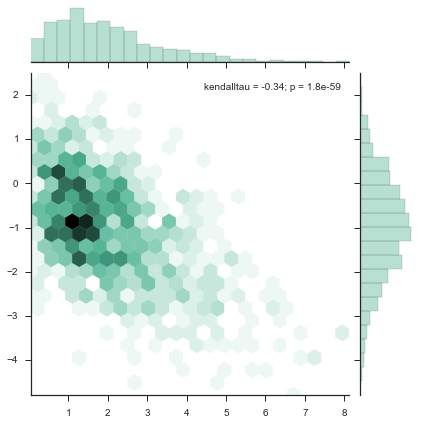

In [11]:
%matplotlib inline
import numpy as np
from scipy.stats import kendalltau
import seaborn as sns
sns.set(style="ticks")

rs = np.random.RandomState(11)
x = rs.gamma(2, size=1000)
y = -.5 * x + rs.normal(size=1000)

ax = sns.jointplot(x, y, kind="hex", stat_func=kendalltau, color="#4CB391")

#### Interactive plotting with bokeh

Bokeh is another interactive plotting library for python, albeit much younger and not quite as nice as plotly. The advantage is that it works locally, without having to send data to plotly and retrieve it each time you wish to construct a plot. 

You can view some [example plots](http://bokeh.pydata.org/en/latest/docs/gallery.html) on the [Bokeh website](http://bokeh.pydata.org/en/latest/). 

In [12]:
# This just keeps the "Warning: BokehJS previously loaded" message from appearing. 
try:
  bokeh.plotting.Figure
except:
  import bokeh
  from bokeh.plotting import *
  output_notebook()

Loading BokehJS ...

In [13]:
from collections import OrderedDict

import numpy as np

from bokeh.plotting import *
from bokeh.models import HoverTool, ColumnDataSource
from bokeh.sampledata.les_mis import data

nodes = data['nodes']
names = [node['name'] for node in sorted(data['nodes'], key=lambda x: x['group'])]

N = len(nodes)
counts = np.zeros((N, N))
for link in data['links']:
    counts[link['source'], link['target']] = link['value']
    counts[link['target'], link['source']] = link['value']

colormap = [
    "#444444", "#a6cee3", "#1f78b4", "#b2df8a", "#33a02c", "#fb9a99",
    "#e31a1c", "#fdbf6f", "#ff7f00", "#cab2d6", "#6a3d9a"
]

xname = []
yname = []
color = []
alpha = []
for i, n1 in enumerate(nodes):
    for j, n2 in enumerate(nodes):
        xname.append(n1['name'])
        yname.append(n2['name'])

        a = min(counts[i,j]/4.0, 0.9) + 0.1
        alpha.append(a)

        if n1['group'] == n2['group']:
            color.append(colormap[n1['group']])
        else:
            color.append('lightgrey')


source = ColumnDataSource(
    data=dict(
        xname=xname,
        yname=yname,
        colors=color,
        alphas=alpha,
        count=counts.flatten(),
    )
)

p = figure(title="Les Mis Occurrences",
    x_axis_location="above", tools="resize,hover,save",
    x_range=list(reversed(names)), y_range=names)
p.plot_width = 800
p.plot_height = 800

p.rect('xname', 'yname', 0.9, 0.9, source=source,
     color='colors', alpha='alphas', line_color=None)

p.grid.grid_line_color = None
p.axis.axis_line_color = None
p.axis.major_tick_line_color = None
p.axis.major_label_text_font_size = "10pt"
p.axis.major_label_standoff = 0
p.xaxis.major_label_orientation = np.pi/3

hover = p.select(dict(type=HoverTool))
hover.tooltips = OrderedDict([
    ('names', '@yname, @xname'),
    ('count', '@count'),
])

show(p)      # show the plot

In [14]:
import pandas as pd

from bokeh.sampledata.glucose import data
from bokeh.plotting import *

TOOLS = "crosshair,pan,wheel_zoom,box_zoom,reset,save,hover"

day = data.ix['2010-10-06']
highs = day[day['glucose'] > 180]
lows = day[day['glucose'] < 80]

p2 = figure(x_axis_type="datetime", tools=TOOLS)

p2.line(
  day.index.to_series(), 
  day['glucose'],
  line_color="gray",
  line_dash="4 4", 
  line_width=1,
  legend="glucose"
)

high_source = ColumnDataSource(data=dict(
  glucose = highs['glucose'],
  datetime = map(str,highs.index)
))

low_source = ColumnDataSource(data=dict(
  glucose = lows['glucose'],
  datetime = map(str,lows.index)
))


p2.circle(highs.index, highs['glucose'], size=6, color='tomato', legend="high",source=high_source)
p2.circle(lows.index, lows['glucose'], size=6, color='navy', legend="low",source=low_source)

p2.title = "Glucose Range"
p2.xgrid[0].grid_line_color=None
p2.ygrid[0].grid_line_alpha=0.5
p2.xaxis.axis_label = 'Time'
p2.yaxis.axis_label = 'Value'

hover = p2.select(dict(type=HoverTool))
hover.tooltips = OrderedDict([
  ('Time', '@datetime'),
  ('Glucose','@glucose')
])

show(p2)

### R plotting

#### Plotting with ggplot or lattice

In [15]:
%reload_ext rpy2.ipython

In [16]:
# Make a fake dataset. 
df = pd.DataFrame(np.random.normal(size=(10,2)),columns=["x","y"])

Start with a data frame of fake data: 

In [17]:
# The dataset
df

,x,y
0,-0.069337,-0.284986
1,-0.862439,-0.715324
2,0.486085,-0.196542
3,0.465176,-2.410816
4,0.268733,-0.245983
5,1.457858,-0.772553
6,1.666534,0.758260
7,-0.201728,0.301892
8,0.838797,-0.324119
9,1.232877,0.199518


In [18]:
# Shove the data into R
%Rpush df

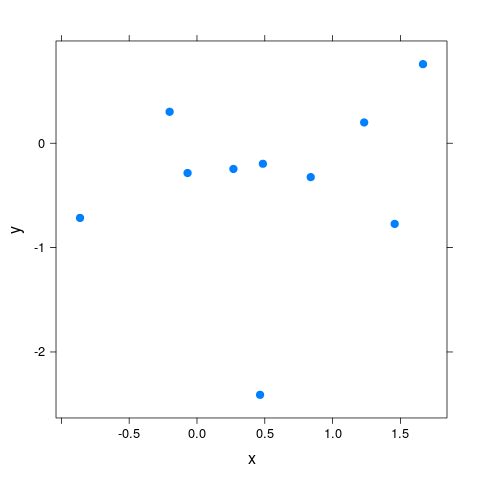

In [19]:
%%R
library(lattice)
# Create a lattice plot. 

trellis.par.set("fontsize",list(text=16,points=10))

print(xyplot(
  y ~ x,
  df,
  par.settings = simpleTheme(pch=20,cex=1.50)
))

#### Plotting with rbokeh

R has a port of bokeh called [rbokeh](http://hafen.github.io/rbokeh/). 

If you're using R as usual, you can install it with: 

```
install.packages("rbokeh")
```

Or if you're using conda:  

```bash
conda install -c r r-rbokeh
```

Then, you need to start the notebook with an R kernel (see [Installing R kernel](#Install-R-kernel-(optional)) above.)

To make plots appear in the notebook, Lars provides this nice method: 

```
# ad-hoc fix from flying-sheep (commented on Oct 7, 2015 on https://github.com/IRkernel/IRkernel/issues/195)

library(htmltools)
library(htmlwidgets)
library(repr)
library(rbokeh)

repr_html.htmlwidget <- function(w) {
    tags <- renderTags(as.tags(w))

    deps <- ''

    for (dep in tags$dependencies) {
        if (!is.null(dep$script)) {
            f <- file.path(dep$src$file, dep$script)
            deps <- sprintf('%s\n<script>// %s\n%s</script>', deps, f, readChar(f, file.info(f)$size))
        }
        if (!is.null(dep$stylesheet)) {
            f <- file.path(dep$src$file, dep$stylesheet)
            deps <- sprintf('%s\n<style>/* %s */\n%s</style>', deps, f, readChar(f, file.info(f)$size))
        }
    }

    paste(deps, tags$html, '<script>HTMLWidgets.staticRender()</script>', sep = '\n');
}

# rbokeh figure stored in 'x'
x = figure() %>% ly_points(cars$speed, cars$dist)

IRdisplay::display_html(repr_html(x))
```

## Including media

You can include images that have already been created elsewhere: 

In [23]:
from IPython.display import *

Image("images_etv5.png")

## Creating reports from a notebook

### With code cells included

If you don't mind code cells included in your HTML report, just go to the **File** menu, and go to **Download as --> HTML**. You could also save as PDF and other formats. 

### With code cells excluded

This is slightly more involved. Apparently jupyter cannot enable this functionality by default due to patent issues. 

First, you'll want to grab some custom templates that we've created that remove code cells when you generate the HTML output from your notebook. Jupyter doesn't do this by default (potentially because of a patent/licensing issue.) 

The templates are located here: 

```bash
/net/snowwhite/home/welchr/scratch/jupyter_templates/basic_noin.tpl
/net/snowwhite/home/welchr/scratch/jupyter_templates/full_noin.tpl
```

You'll want to copy those somewhere, a good location would be: `~/.jupyter/templates/`. 

Now, edit your `~/.jupyter/jupyter_nbconvert_config.py` file to have this: 

```python
c.HTMLExporter.template_path = ['.','/home/<you>/.jupyter/templates/']
```

*** If you don't have a jupyter_nbconvert_config.py file ***, then you can create one by doing: 

```bash
jupyter nbconvert --generate-config
```

Finally, you can create a nice HTML report from your notebooks by doing: 

```bash
jupyter nbconvert --to html --template full_noin <notebook file>
```

You can also write PDF and other formats as well. 

## Executing notebooks offline (not in a browser)

You can execute an entire notebook without having to use your browser. This can be useful for long running notebooks, or when you might lose your browser connection. 

First, make one small tweak to your notebook config (`~/.jupyter/jupyter_nbconvert_config.py`) that allows for longer execution times: 

```python
c.ExecutePreprocessor.timeout = 9999999
```

Use the following command: 

```bash
jupyter nbconvert --execute --allow-errors --inplace --to notebook --template full_noin <notebook file>
```

This will execute your notebook, skipping cells that have errors (`--allow-errors`). Results and output will be saved back into your notebook (.ipynb) file. 

Now that you've run your notebook, and the results are saved, you could convert the output into a report: 

```bash
jupyter nbconvert --to html --template full_noin <notebook file>
```

## Helpful hints

**The session seems to be locked up. What do I do now?**

In the top menus, try Kernel $\dashrightarrow$ Interrupt. If that fails, do Kernel $\dashrightarrow$ Restart. 

Failing that, you can always kill the Jupyter notebook process itself, and restart it. 

**How do I hide input code cells while in the notebook interface?**

Drop this code into your `~/.jupyter/custom/custom.js` file: 

```
code_show = true;
function code_toggle() {
  if (code_show) {
    $("div.input").hide();
    $("div.output_wrapper > div.output:empty").parents("div.cell").hide();
  } else {
    $('div.input').show();
    $("div.output_wrapper > div.output:empty").parents("div.cell").show();
  }

  code_show = !code_show;
}

define(['base/js/namespace','base/js/events'], function(IPython, events) {
  events.on('app_initialized.NotebookApp', function(){
    $("#view_menu").append("<li id=\"toggle_toolbar\" title=\"Show/Hide code cells\"><a href=\"javascript:code_toggle()\">Toggle Code Cells</a></li>");
  });
});
```

This creates an item under the "View" menu to toggle code cells from being shown. 

**How do I change the indentation on code?**

Add the following line to your custom.js file (see above):

```javascript
define(['base/js/namespace','base/js/events'], function(IPython, events) {
  events.on('app_initialized.NotebookApp', function(){
    // This sets the indentation within code cells
    IPython.Cell.options_default.cm_config.indentUnit = 2
  });
});
```

**Can I make the notebook wider in my browser?**

Add the following to your custom CSS file ` ~/.jupyter/custom/custom.css`: 

```css
.container {
  width: 1400px;
}
```

## Other resources

[Official Jupyter notebook tutorials](https://github.com/jupyter/notebook/blob/master/docs/source/examples/Notebook/Examples%20and%20Tutorials%20Index.ipynb)

[Jupyter notebook Tutorial / Documentation](https://jupyter-notebook-beginner-guide.readthedocs.org/en/latest/index.html)

[Links to neat/helpful notebooks](http://nb.bianp.net/sort/views/)

In [21]:
%%javascript

requirejs.config({
  enforceDefine: true,
  paths: {
    "lodash": "https://cdnjs.cloudflare.com/ajax/libs/lodash.js/3.3.0/lodash.min",
    "underscore.string": "https://cdnjs.cloudflare.com/ajax/libs/underscore.string/3.0.3/underscore.string"
  }
})

require(["lodash","underscore.string"],function(_,_s) {
  console.log("Creating table of contents..")
  
  var template = "<div style='padding-bottom: 1em'><span style='font-size: 18pt; vertical-align: middle;'>%s</span><%s class='toc'><a href='#%s'>%s</a></%s></div>"
  
  $("div.toc").empty()
  
  $("h1:not(.toc),h2:not(.toc),h3:not(.toc),h4:not(.toc)").each(function(i) {
    var text = $(this).text().replace("¶","");

    if (_s.contains(text,"Keyboard shortcut")) {
      return
    }

    if (_s.contains(text,"Contents")) {
      return
    }

    var slug = $(this).attr("id");

    var ind = $(this).prop("tagName").replace("H","")
    
    var htag = $(this).prop("tagName").replace("H","h")
    
    if (ind > 1) { 
      var dashes = _.times(ind-2,function() {return "&nbsp;&nbsp;"}).join("");

//       if (ind != 1) {
//         dashes = dashes + "•";
//       }

      var html = _s.sprintf(template,dashes,htag,slug,text,htag);
      console.log(html)

      $("div.toc").append(html);
    }
  });
})()

<IPython.core.display.Javascript object>

In [22]:
%%javascript

// Some quick javascript for getting rid of the red STDERR message boxes on the page. 

// requirejs.config({
//   enforceDefine: true,
//   "paths": {
//     "jquery": "http://ajax.googleapis.com/ajax/libs/jquery/2.0.0/jquery.min"
//   }
// })

// require(["jquery"],function(jquery) {
//   console.log(jquery("div.output_stderr").parent("div.output_area").hide())
// })

<IPython.core.display.Javascript object>